In [ ]:
!nvidia-smi


Tue Apr 18 08:35:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Dataset and Requied_Files

## Download and Prepare Dataset and Requied_Files Folders

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1q-alwIBf1sYToN5D4SAi5kaVMSemuv-J

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1q-alwIBf1sYToN5D4SAi5kaVMSemuv-J
From (redirected): https://drive.google.com/uc?id=1q-alwIBf1sYToN5D4SAi5kaVMSemuv-J&confirm=t&uuid=6e183231-9e0f-4379-b58a-6624681854ea
To: /content/PASCAL.zip
100% 116M/116M [00:02<00:00, 43.8MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/PASCAL.zip'
folder_path = '/content/PASCAL'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/PASCAL.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/PASCAL.zip has been deleted successfully.


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QheCGZHOZeAQ5MIu-3_4lE-Qf0hu6xX9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Downloading...
From: https://drive.google.com/uc?id=1QheCGZHOZeAQ5MIu-3_4lE-Qf0hu6xX9
To: /content/Requied_Files.zip
100% 10.7k/10.7k [00:00<00:00, 15.8MB/s]


In [ ]:
import zipfile
zip_file_path = '/content/Requied_Files.zip'
folder_path = '/content/Requied_Files'
# Extract the zip file to the specified folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

In [ ]:
import os
file_path = "/content/Requied_Files.zip"
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted successfully.")
else:
    print(f"{file_path} does not exist.")

/content/Requied_Files.zip has been deleted successfully.


# Train Model

## Training

In [ ]:
import sys
sys.path.append('/content/Requied_Files/Requied_Files/')
import torch
import torchvision
import utils
import re
import pascal_dataset, engine, coco_eval, coco_utils, transforms, utils
import torch.utils.data
import torchvision.transforms as T
import utils
from engine import train_one_epoch, evaluate
from pascal_dataset import PASCALDataset
from torch.utils.data import DataLoader
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
from coco_eval import CocoEvaluator
# from dataset import PASCALDataset
from engine import train_one_epoch, evaluate
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from pascal_dataset import PASCALDataset
import utils
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import copy
import torch.optim as optim
from torch.optim import lr_scheduler
import shutil
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import sys
sys.path.append('/content/Requied_Files/Requied_Files/')
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import pascal_dataset, engine, coco_eval, coco_utils, transforms, utils
import torch.utils.data
import torchvision.transforms as T
import utils
from engine import train_one_epoch, evaluate, _get_iou_types
from pascal_dataset import PASCALDataset
from torch.utils.data import DataLoader
from PIL import Image
import random

In [ ]:
# create dataset objects for training, validation, and testing sets
dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/PASCAL/val')
dataset_test = PASCALDataset('/content/PASCAL/PASCAL/test')

In [ ]:
# create data loader objects for training, validation, and testing sets
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
# create an object of the Faster R-CNN model with ResNet50 as backbone and load pretrained weights
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 83.7MB/s]


In [ ]:
# create an optimizer object with stochastic gradient descent (SGD) algorithm
# and set learning rate, momentum, and weight decay values
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

# move the model to the appropriate device (GPU if available, otherwise CPU)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import torch
from pascal_dataset import PASCALDataset
import utils

# Create instances of PASCALDataset for training and validation datasets
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Create data loaders for the training and validation datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

# Define number of epochs and frequency of status updates during training
epoch = 5
print_freq = 25

# Train and validate the model for the specified number of epochs
for epoch in range(epoch):
    # Train the model for one epoch using the train_loader
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate the model using the val_loader
    evaluate(model, val_loader, device)


In [ ]:
import torch
import shutil

# Save the state dictionary of the trained model as a file named 'model1.pth'
torch.save(model.state_dict(), 'model1.pth')

# Copy the saved model file from its current location to Google Drive
shutil.copyfile('/content/model1.pth', '/content/drive/My Drive/model1.pth')


In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 5 # Replace 1 with the appropriate epoch number
print_freq = 25 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)

Epoch: [0]  [  0/251]  eta: 0:34:00  lr: 0.000005  loss: 0.2050 (0.2050)  loss_classifier: 0.1115 (0.1115)  loss_box_reg: 0.0562 (0.0562)  loss_objectness: 0.0094 (0.0094)  loss_rpn_box_reg: 0.0280 (0.0280)  time: 8.1288  data: 0.2454  max mem: 4010
Epoch: [0]  [ 25/251]  eta: 0:05:49  lr: 0.000105  loss: 0.1778 (0.1885)  loss_classifier: 0.0660 (0.0754)  loss_box_reg: 0.0816 (0.0937)  loss_objectness: 0.0041 (0.0070)  loss_rpn_box_reg: 0.0103 (0.0125)  time: 1.2738  data: 0.0115  max mem: 7462
Epoch: [0]  [ 50/251]  eta: 0:04:46  lr: 0.000205  loss: 0.1719 (0.1966)  loss_classifier: 0.0699 (0.0782)  loss_box_reg: 0.0980 (0.0976)  loss_objectness: 0.0057 (0.0074)  loss_rpn_box_reg: 0.0130 (0.0134)  time: 1.2929  data: 0.0119  max mem: 7462
Epoch: [0]  [ 75/251]  eta: 0:04:07  lr: 0.000305  loss: 0.1980 (0.1998)  loss_classifier: 0.0751 (0.0772)  loss_box_reg: 0.0968 (0.0998)  loss_objectness: 0.0052 (0.0085)  loss_rpn_box_reg: 0.0142 (0.0143)  time: 1.3584  data: 0.0121  max mem: 7462


In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 5 # Replace 1 with the appropriate epoch number
print_freq = 10 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [  0/251]  eta: 0:35:11  lr: 0.000025  loss: 0.3348 (0.3348)  loss_classifier: 0.1235 (0.1235)  loss_box_reg: 0.1730 (0.1730)  loss_objectness: 0.0145 (0.0145)  loss_rpn_box_reg: 0.0238 (0.0238)  time: 8.4112  data: 0.2903  max mem: 4459
Epoch: [0]  [ 10/251]  eta: 0:04:30  lr: 0.000225  loss: 0.2431 (0.2390)  loss_classifier: 0.0985 (0.0937)  loss_box_reg: 0.1095 (0.1154)  loss_objectness: 0.0099 (0.0108)  loss_rpn_box_reg: 0.0123 (0.0191)  time: 1.1204  data: 0.0329  max mem: 7462
Epoch: [0]  [ 20/251]  eta: 0:03:02  lr: 0.000425  loss: 0.1626 (0.2081)  loss_classifier: 0.0749 (0.0833)  loss_box_reg: 0.0851 (0.1002)  loss_objectness: 0.0059 (0.0078)  loss_rpn_box_reg: 0.0092 (0.0168)  time: 0.4077  data: 0.0100  max mem: 7462
Epoch: [0]  [ 30/251]  eta: 0:02:25  lr: 0.000624  loss: 0.1580 (0.2008)  loss_classifier: 0.0683 (0.0803)  loss_box_reg: 0.0740 (0.0965)  loss_objectness: 0.0037 (0.0078)  loss_rpn_box_reg: 0.0126 (0.0163)  time: 0.4023  data: 0.0119  max mem: 7462


In [ ]:
torch.save(model.state_dict(), 'model1.pth')


In [ ]:

shutil.copyfile('/content/model1.pth', '/content/drive/My Drive/model1.pth')


'/content/drive/My Drive/model1.pth'

In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 5 # Replace 1 with the appropriate epoch number
print_freq = 10 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)

Epoch: [0]  [  0/251]  eta: 0:38:14  lr: 0.000005  loss: 0.2392 (0.2392)  loss_classifier: 0.0787 (0.0787)  loss_box_reg: 0.1403 (0.1403)  loss_objectness: 0.0098 (0.0098)  loss_rpn_box_reg: 0.0104 (0.0104)  time: 9.1403  data: 0.2559  max mem: 4895
Epoch: [0]  [ 10/251]  eta: 0:07:41  lr: 0.000045  loss: 0.1594 (0.1868)  loss_classifier: 0.0684 (0.0715)  loss_box_reg: 0.0775 (0.0957)  loss_objectness: 0.0071 (0.0063)  loss_rpn_box_reg: 0.0110 (0.0134)  time: 1.9161  data: 0.0319  max mem: 7127
Epoch: [0]  [ 20/251]  eta: 0:06:02  lr: 0.000085  loss: 0.1633 (0.1974)  loss_classifier: 0.0643 (0.0727)  loss_box_reg: 0.0775 (0.0993)  loss_objectness: 0.0069 (0.0118)  loss_rpn_box_reg: 0.0101 (0.0135)  time: 1.1928  data: 0.0113  max mem: 7127
Epoch: [0]  [ 30/251]  eta: 0:05:30  lr: 0.000125  loss: 0.2133 (0.2262)  loss_classifier: 0.0897 (0.0846)  loss_box_reg: 0.1033 (0.1129)  loss_objectness: 0.0064 (0.0123)  loss_rpn_box_reg: 0.0151 (0.0165)  time: 1.2637  data: 0.0122  max mem: 7127


In [ ]:
# Save model to Drive
torch.save(model.state_dict(), '/content/drive/MyDrive/HWs/HW3/Q2/Models/model2.pth')

In [ ]:
_get_iou_types(model)

['bbox']

# Test

In [ ]:
for images, targets in data_loader_test:
    # Move images to the specified device (e.g. GPU) for faster computation
    images = list(image.to(device) for image in images)

    # Move target annotations to the same device
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    # Forward pass of the model to obtain the loss dictionary
    loss_dict = model(images, targets)


In [ ]:
# Import the necessary library functions
from torchvision.datasets import CocoDetection
from torchvision.datasets.coco import get_coco_api_from_dataset

# Get the COCO API from the test dataset
coco = get_coco_api_from_dataset(data_loader_test.dataset)


creating index...
index created!


In [ ]:
# Define the IoU type(s) for evaluation (here, only "bbox" is used)
iou_types = ["bbox"]

# Instantiate the COCO evaluation object with the specified IoU type(s)
coco_evaluator = CocoEvaluator(coco, iou_types)

# Use the trained model to generate predictions for the input images
outputs = model(images)

# Create a dictionary mapping each image ID to its corresponding prediction output
res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}

# Update the COCO evaluation object with the predicted outputs for the current batch of images
coco_evaluator.update(res)


In [ ]:
# Synchronize results across multiple processes for COCO evaluation
coco_evaluator.synchronize_between_processes()

# Accumulate results for COCO evaluation
coco_evaluator.accumulate()

# Summarize COCO evaluation results
coco_evaluator.summarize()


Accumulating evaluation results...
DONE (t=0.02s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.752
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.775
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.662
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.875
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [ ]:
# Accessing the first statistic from the COCO evaluation object for bounding box detection
# The 'coco_evaluator' object is assumed to be an instance of the 'COCOeval' class from the PyCocoTools library
# The 'coco_eval' attribute is a dictionary of COCO evaluation results
# The 'bbox' key accesses the evaluation results for bounding box detection
# The 'stats' attribute is a list of statistics computed during the evaluation
# Indexing with '[0]' returns the first statistic, which is the average precision (AP) across all object categories
coco_evaluator.coco_eval['bbox'].stats[0]


0.751753300330033

In [ ]:
dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/PASCAL/val')
dataset_test = PASCALDataset('/content/PASCAL/PASCAL/test')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
# move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define classes list
classes = [
    "__background__",  # 0 index
    "person",
    "bicycle",
    "car",
    "motorbike",
    "aeroplane",
    "bus",
    "bird",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "boat",
    "bottle",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor"
]

# Define bbox colors for each class
colors = {
    "person": "red",
    "bicycle": "green",
    "car": "blue",
    "motorbike": "yellow",
    "aeroplane": "cyan",
    "bus": "magenta",
    "bird": "orange",
    "cat": "purple",
    "chair": "brown",
    "cow": "pink",
    "diningtable": "gray",
    "dog": "olive",
    "horse": "teal",
    "boat": "navy",
    "bottle": "maroon",
    "pottedplant": "coral",
    "sheep": "gold",
    "sofa": "lime",
    "train": "indigo",
    "tvmonitor": "darkorange"
}

In [ ]:
def plot_image_with_bboxes(image, targets):
    boxes = targets["boxes"]
    labels = targets["labels"]
    fig, ax = plt.subplots(1)
    ax.imshow(image.permute(1,2,0))
    handles = {}
    for label in np.unique(labels):
        class_name = classes[label]
        mask = labels == label
        if label == 0:
            # ignore background class
            continue
        label_boxes = boxes[mask, :]
        for box in label_boxes:
            x1, y1, x2, y2 = box.cpu().numpy()
            edgecolor = colors[class_name]
            if class_name not in handles:
                handles[class_name] = mpatches.Patch(color=edgecolor, label=f'{class_name}: {sum(mask)}')
            ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=edgecolor, linewidth=2))
    ax.legend(handles=handles.values(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()

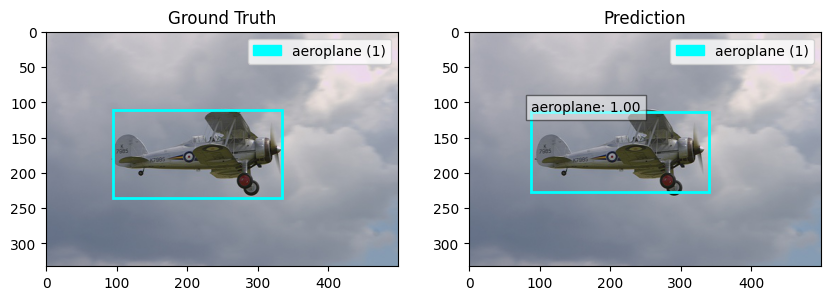

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


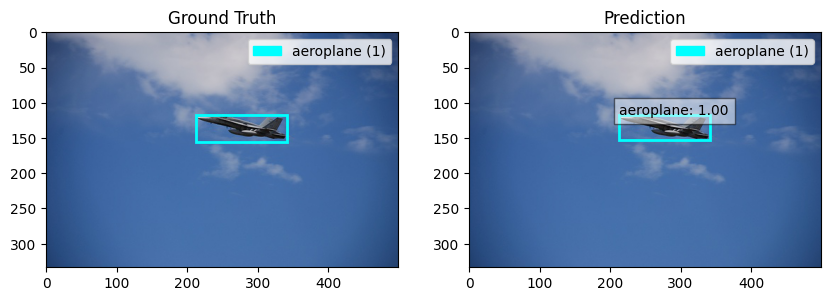

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


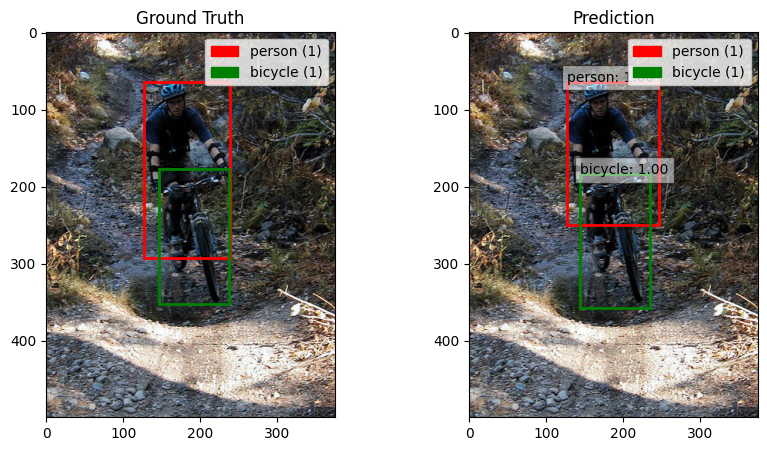

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


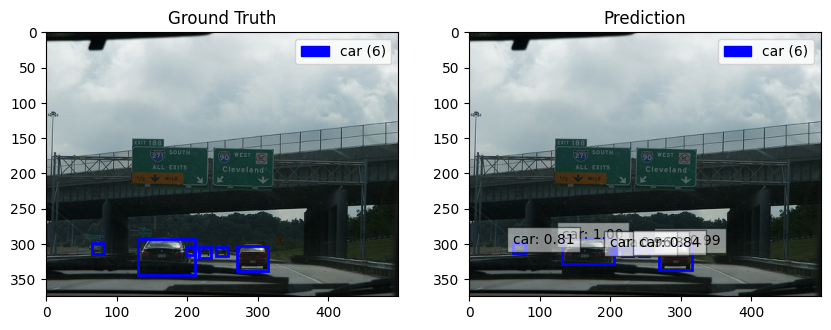

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


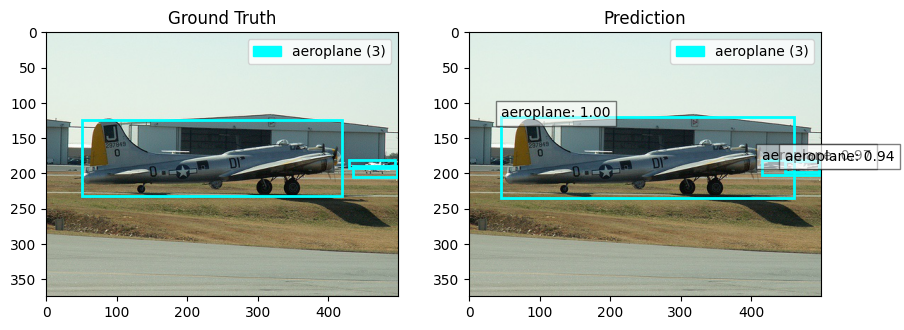

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


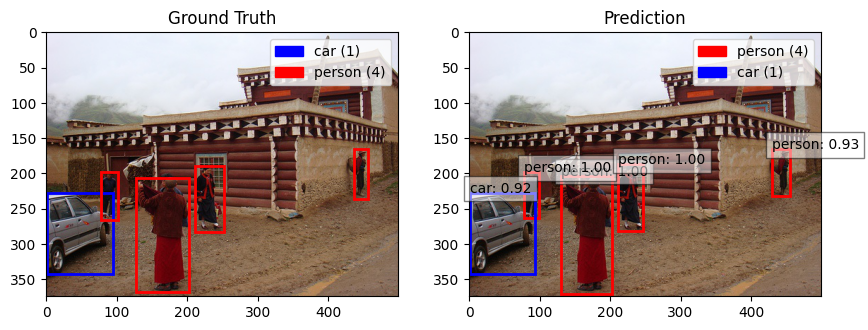

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


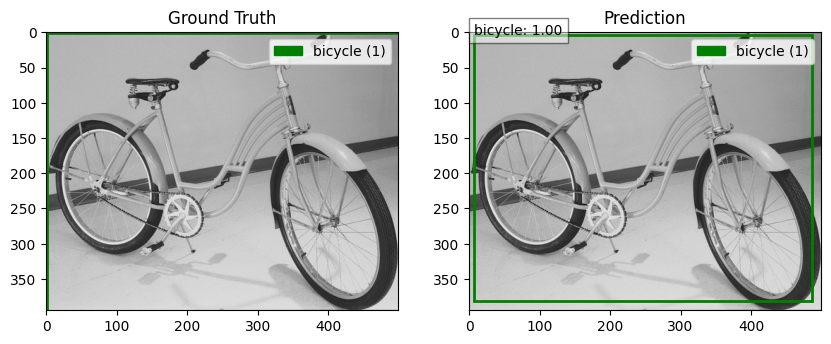

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


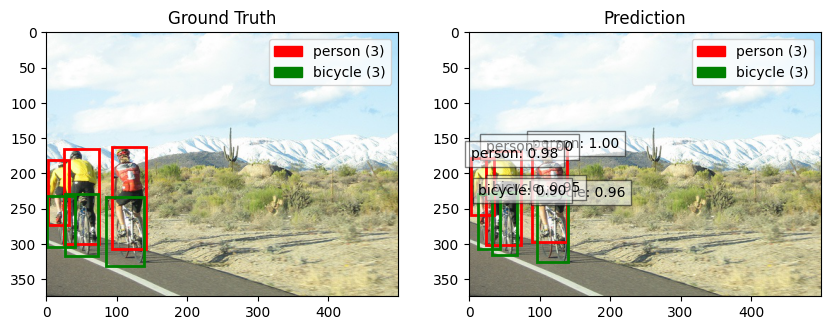

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


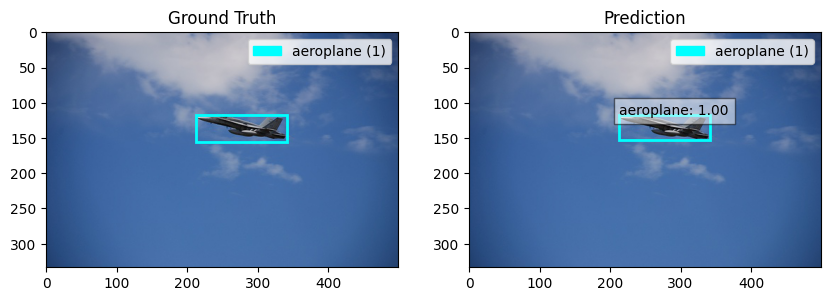

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


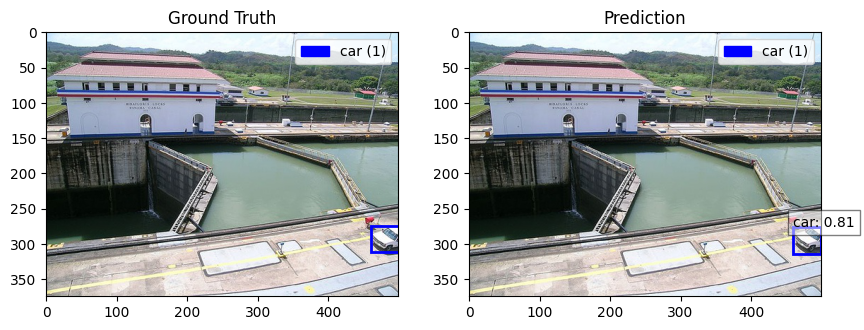

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


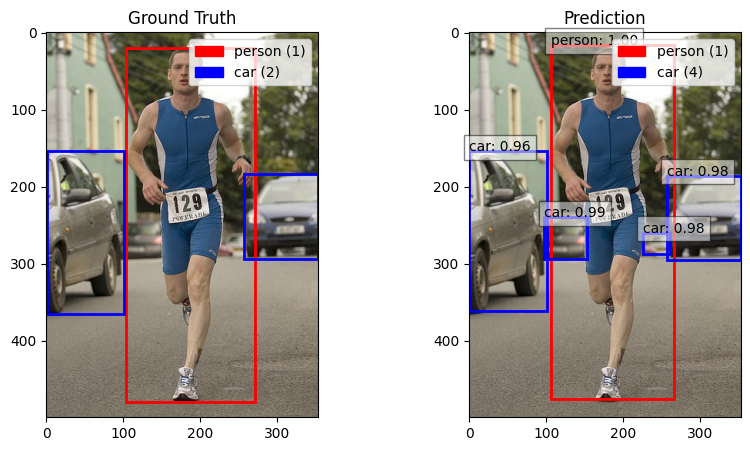

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


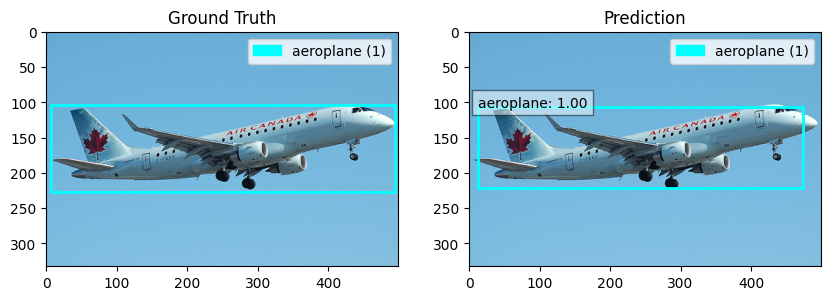

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


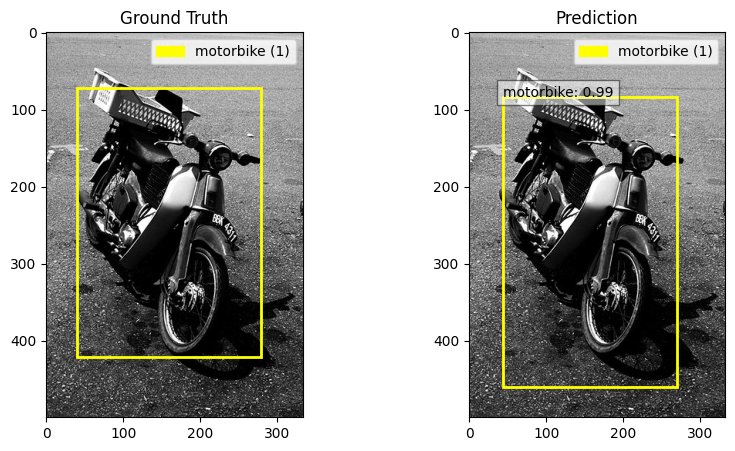

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


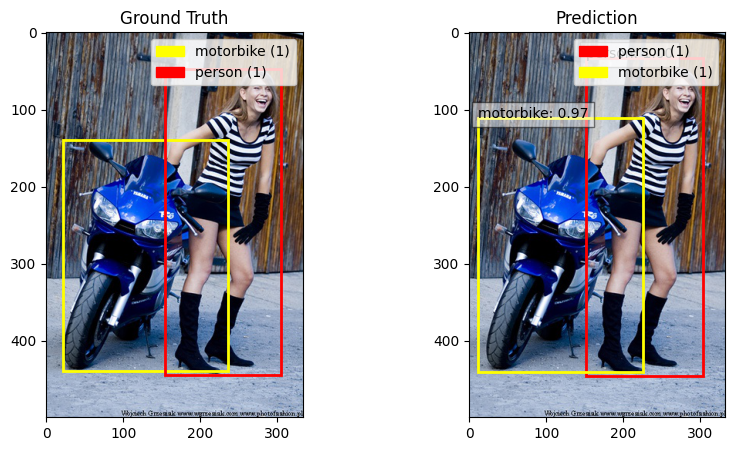

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


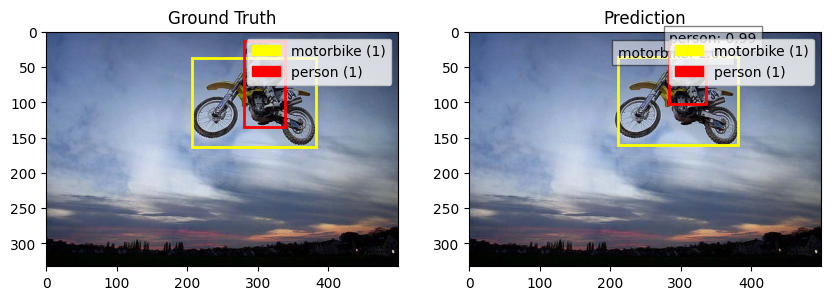

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


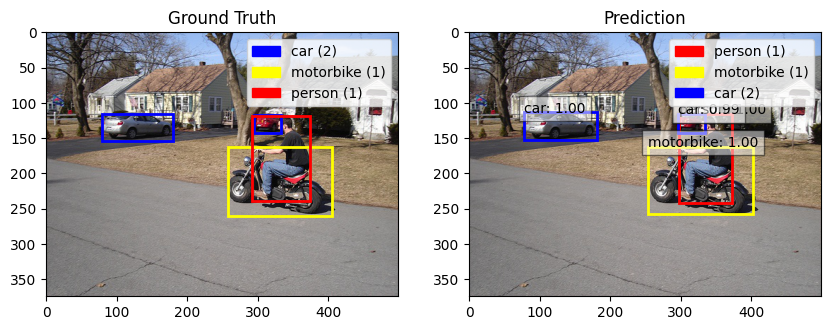

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


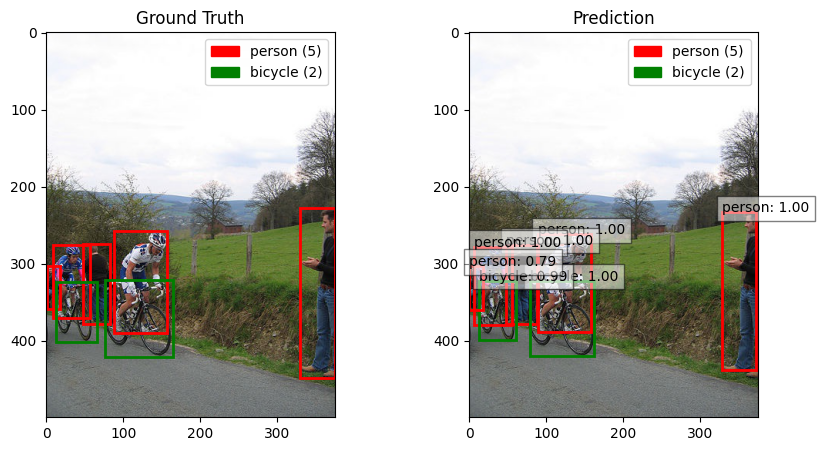

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


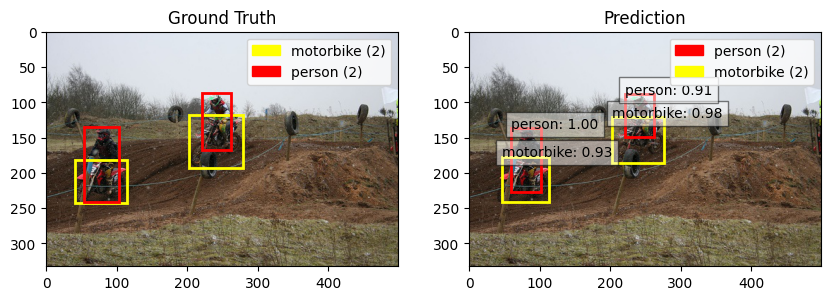

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


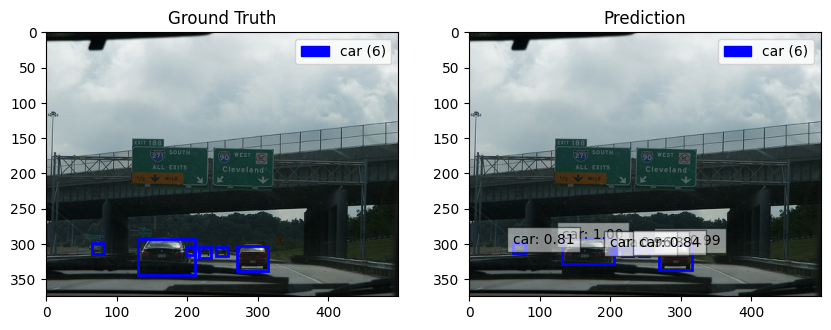

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


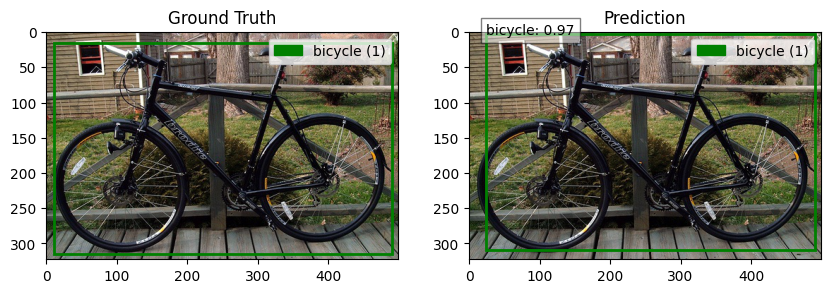

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


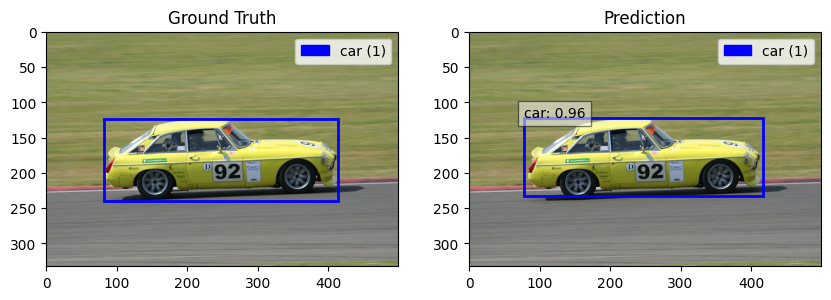

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


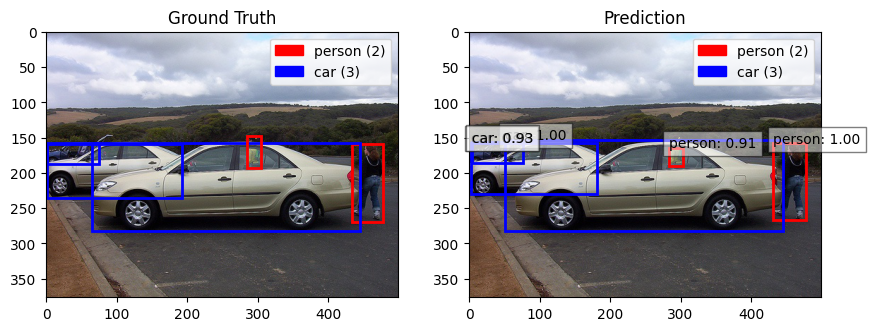

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


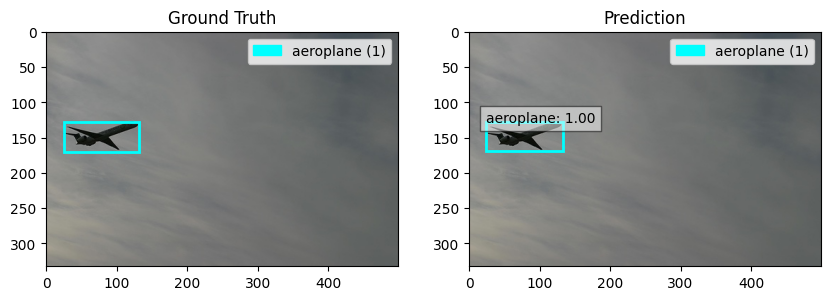

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


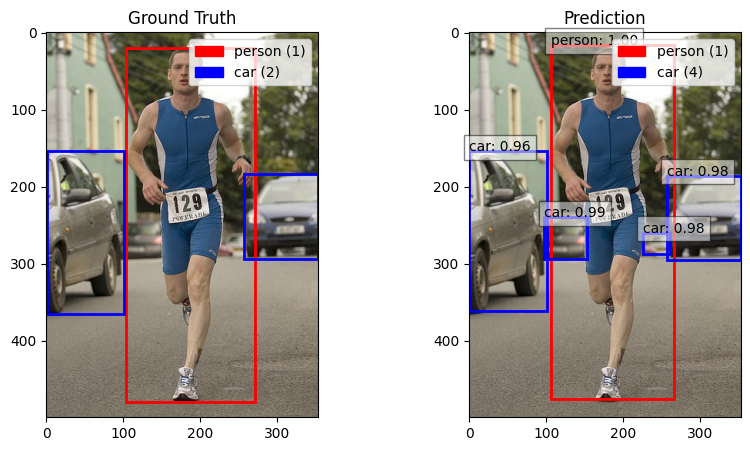

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


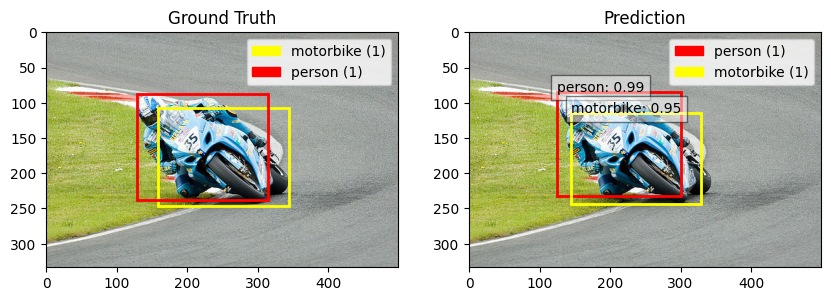

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


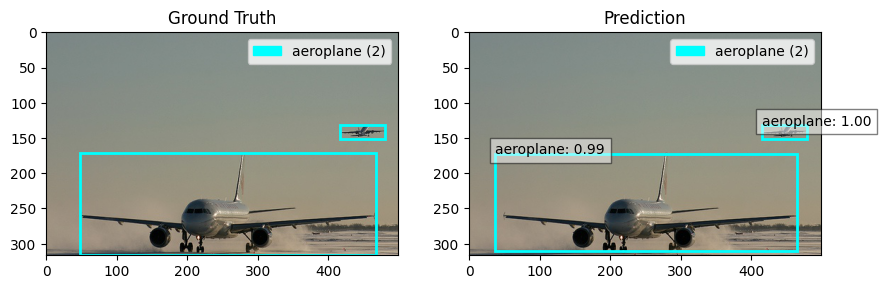

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


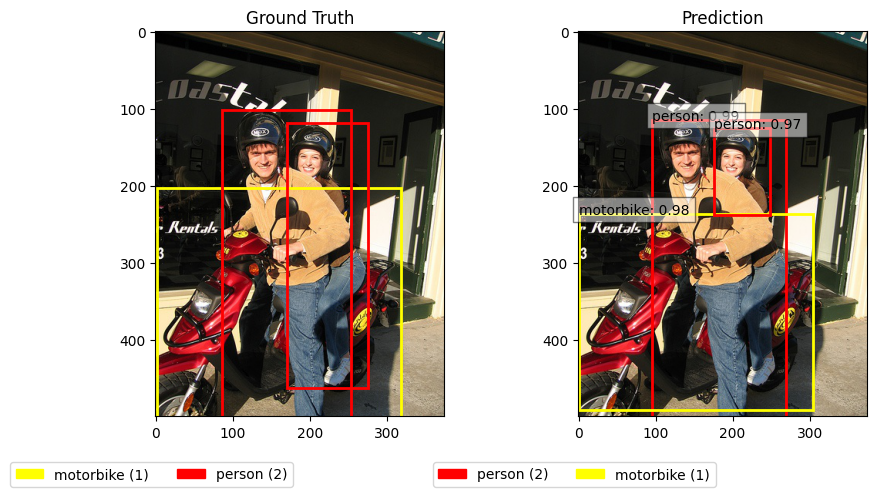

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='upper right', ncol=len(gt_legend))
    
    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, bbox_to_anchor=(0.5, -0.1), loc='upper right', ncol=len(pred_legend))
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


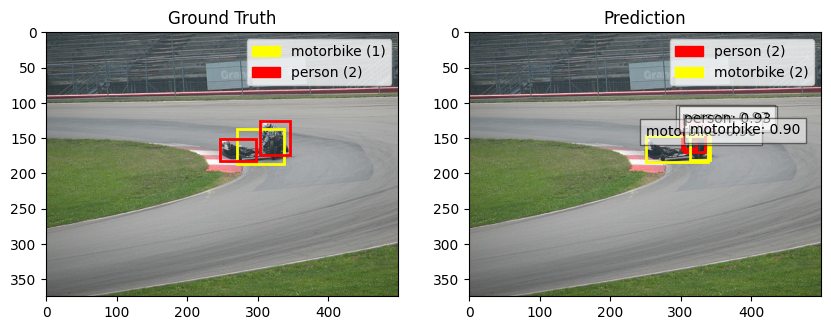

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


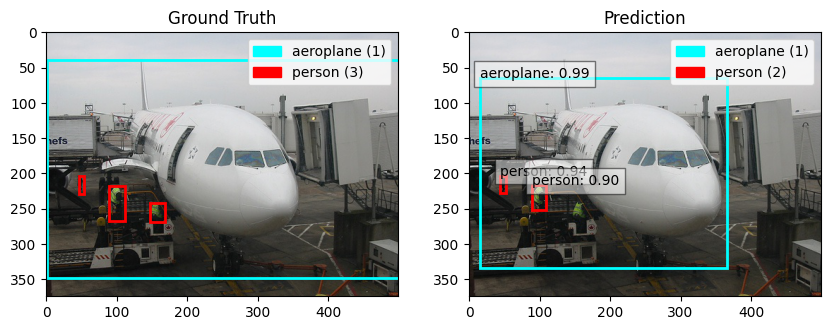

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


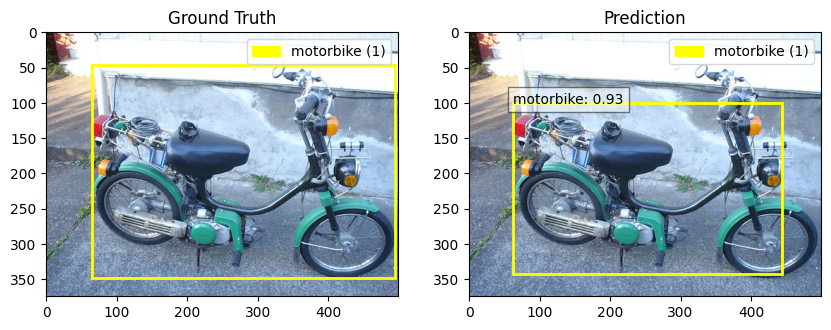

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.7:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


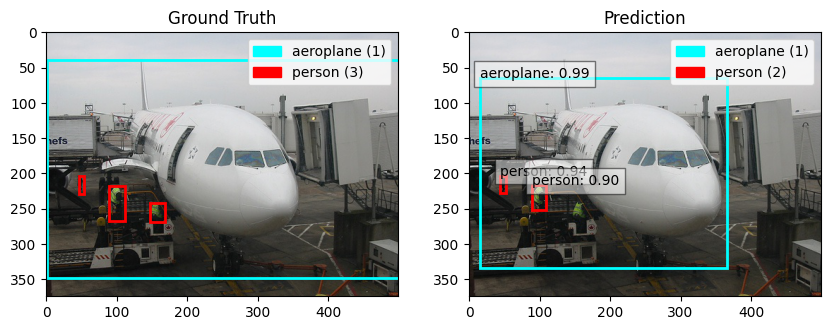

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.8:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


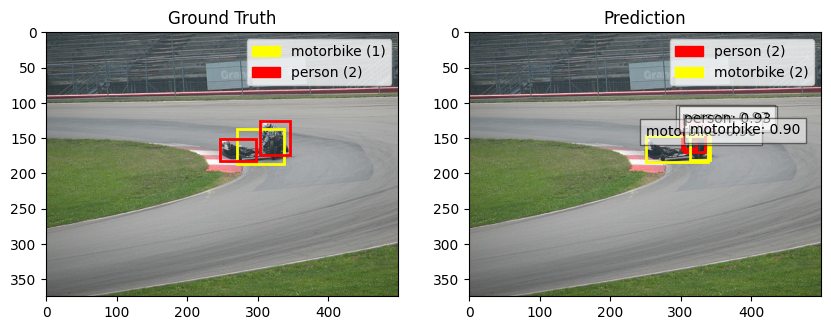

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


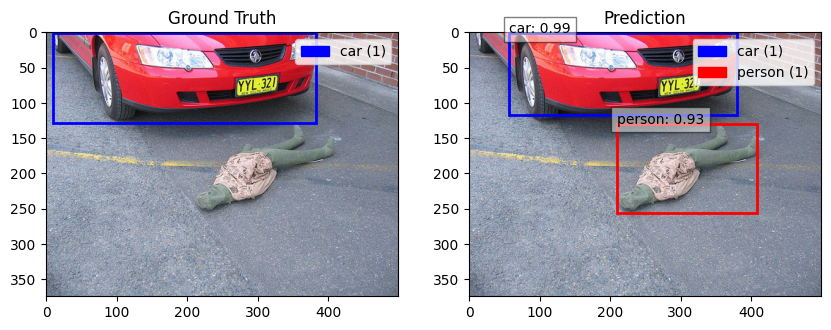

In [ ]:
def plot_image_with_bboxes(image, targets, predictions):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image.permute(1, 2, 0))
    ax2.imshow(image.permute(1, 2, 0))
    ax1.set_title('Ground Truth')
    ax2.set_title('Prediction')
    
    # Plot ground truth
    gt_boxes = targets['boxes']
    gt_labels = targets['labels']
    gt_counts = dict()
    for box, label in zip(gt_boxes, gt_labels):
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax1.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        if class_name not in gt_counts:
            gt_counts[class_name] = 1
        else:
            gt_counts[class_name] += 1
    # Add GT legend
    gt_legend = []
    for class_name, count in gt_counts.items():
        gt_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    # ax1.legend(handles=gt_legend, bbox_to_anchor=(0.5, -0.1), loc='right', ncol=len(gt_legend))
    ax1.legend(handles=gt_legend, loc='upper right')

    # Plot predictions
    pred_boxes = predictions['boxes']
    pred_labels = predictions['labels']
    pred_scores = predictions['scores']
    pred_counts = dict()
    for box, label, score in zip(pred_boxes, pred_labels, pred_scores):
        if score < 0.75:
            continue
        x1, y1, x2, y2 = box.cpu().numpy()
        class_name = classes[label]
        edgecolor = colors[class_name]
        ax2.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=edgecolor, linewidth=2))
        ax2.text(x1, y1, f'{class_name}: {score:.2f}', bbox=dict(facecolor='white', alpha=0.5))
        if class_name not in pred_counts:
            pred_counts[class_name] = 1
        else:
            pred_counts[class_name] += 1
    # Add Prediction legend
    pred_legend = []
    for class_name, count in pred_counts.items():
        pred_legend.append(mpatches.Patch(color=colors[class_name], label=f'{class_name} ({count})'))
    ax2.legend(handles=pred_legend, loc='upper right')
    
    plt.savefig('image_with_bboxes.pdf', bbox_inches='tight')
    plt.show()


# Evaluate on 3 random test images
for i in range(1):
    image, target = dataset_test[random.randint(0, len(dataset_test))]
    model.eval()
    with torch.no_grad():
        prediction = model([image.to(device)])[0]
    plot_image_with_bboxes(image, target, prediction)


# Other Implementation

In [ ]:
dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/PASCAL/val')
dataset_test = PASCALDataset('/content/PASCAL/PASCAL/test')

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 90.2MB/s]


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
# move model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 5 # Replace 1 with the appropriate epoch number
print_freq = 10 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [  0/251]  eta: 0:35:11  lr: 0.000025  loss: 0.3348 (0.3348)  loss_classifier: 0.1235 (0.1235)  loss_box_reg: 0.1730 (0.1730)  loss_objectness: 0.0145 (0.0145)  loss_rpn_box_reg: 0.0238 (0.0238)  time: 8.4112  data: 0.2903  max mem: 4459
Epoch: [0]  [ 10/251]  eta: 0:04:30  lr: 0.000225  loss: 0.2431 (0.2390)  loss_classifier: 0.0985 (0.0937)  loss_box_reg: 0.1095 (0.1154)  loss_objectness: 0.0099 (0.0108)  loss_rpn_box_reg: 0.0123 (0.0191)  time: 1.1204  data: 0.0329  max mem: 7462
Epoch: [0]  [ 20/251]  eta: 0:03:02  lr: 0.000425  loss: 0.1626 (0.2081)  loss_classifier: 0.0749 (0.0833)  loss_box_reg: 0.0851 (0.1002)  loss_objectness: 0.0059 (0.0078)  loss_rpn_box_reg: 0.0092 (0.0168)  time: 0.4077  data: 0.0100  max mem: 7462
Epoch: [0]  [ 30/251]  eta: 0:02:25  lr: 0.000624  loss: 0.1580 (0.2008)  loss_classifier: 0.0683 (0.0803)  loss_box_reg: 0.0740 (0.0965)  loss_objectness: 0.0037 (0.0078)  loss_rpn_box_reg: 0.0126 (0.0163)  time: 0.4023  data: 0.0119  max mem: 7462


In [ ]:
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from pascal_dataset import PASCALDataset
import utils
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import copy
import torch.optim as optim
from torch.optim import lr_scheduler
# from PennFudanDataset import PennFudanDataset

In [ ]:
for images, targets in data_loader_test:
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    loss_dict = model(images, targets)


In [ ]:
coco = get_coco_api_from_dataset(data_loader_test.dataset)

creating index...
index created!


In [ ]:
iou_types = ["bbox"]

In [ ]:
coco_evaluator = CocoEvaluator(coco, iou_types)

In [ ]:
outputs = model(images)

In [ ]:
res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}

In [ ]:
coco_evaluator.update(res)

In [ ]:
coco_evaluator.synchronize_between_processes()
coco_evaluator.accumulate()
coco_evaluator.summarize()

Accumulating evaluation results...
DONE (t=0.02s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.752
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.837
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.775
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.662
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.875
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [ ]:
coco_evaluator.coco_eval['bbox'].stats[0]

0.751753300330033

In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 1 # Replace 1 with the appropriate epoch number
print_freq = 1 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [ 0/63]  eta: 0:08:26  lr: 0.000086  loss: 0.1965 (0.1965)  loss_classifier: 0.0771 (0.0771)  loss_box_reg: 0.0959 (0.0959)  loss_objectness: 0.0133 (0.0133)  loss_rpn_box_reg: 0.0102 (0.0102)  time: 8.0373  data: 0.4281  max mem: 24465
Epoch: [0]  [ 1/63]  eta: 0:04:35  lr: 0.000166  loss: 0.1965 (0.2042)  loss_classifier: 0.0771 (0.0806)  loss_box_reg: 0.0868 (0.0913)  loss_objectness: 0.0133 (0.0202)  loss_rpn_box_reg: 0.0102 (0.0120)  time: 4.4387  data: 0.2326  max mem: 24628
Epoch: [0]  [ 2/63]  eta: 0:03:16  lr: 0.000247  loss: 0.2119 (0.2230)  loss_classifier: 0.0841 (0.0849)  loss_box_reg: 0.0959 (0.1039)  loss_objectness: 0.0133 (0.0162)  loss_rpn_box_reg: 0.0139 (0.0180)  time: 3.2197  data: 0.1671  max mem: 24628
Epoch: [0]  [ 3/63]  eta: 0:02:36  lr: 0.000327  loss: 0.1965 (0.2064)  loss_classifier: 0.0771 (0.0803)  loss_box_reg: 0.0868 (0.0950)  loss_objectness: 0.0082 (0.0142)  loss_rpn_box_reg: 0.0135 (0.0169)  time: 2.6097  data: 0.1270  max mem: 24628
Epoc

In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 1 # Replace 1 with the appropriate epoch number
print_freq = 1 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [  0/251]  eta: 0:02:28  lr: 0.000025  loss: 0.1903 (0.1903)  loss_classifier: 0.0538 (0.0538)  loss_box_reg: 0.1074 (0.1074)  loss_objectness: 0.0031 (0.0031)  loss_rpn_box_reg: 0.0259 (0.0259)  time: 0.5905  data: 0.2696  max mem: 27166
Epoch: [0]  [  1/251]  eta: 0:01:50  lr: 0.000045  loss: 0.1903 (0.1971)  loss_classifier: 0.0538 (0.0571)  loss_box_reg: 0.1074 (0.1174)  loss_objectness: 0.0031 (0.0049)  loss_rpn_box_reg: 0.0093 (0.0176)  time: 0.4417  data: 0.1363  max mem: 27166
Epoch: [0]  [  2/251]  eta: 0:01:37  lr: 0.000065  loss: 0.1903 (0.1643)  loss_classifier: 0.0538 (0.0509)  loss_box_reg: 0.1074 (0.0934)  loss_objectness: 0.0031 (0.0038)  loss_rpn_box_reg: 0.0133 (0.0162)  time: 0.3902  data: 0.0916  max mem: 27166
Epoch: [0]  [  3/251]  eta: 0:01:24  lr: 0.000085  loss: 0.1177 (0.1526)  loss_classifier: 0.0386 (0.0472)  loss_box_reg: 0.0769 (0.0893)  loss_objectness: 0.0016 (0.0032)  loss_rpn_box_reg: 0.0093 (0.0129)  time: 0.3394  data: 0.0693  max mem: 27

In [ ]:
from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 1 # Replace 1 with the appropriate epoch number
print_freq = 10 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [  0/251]  eta: 0:01:56  lr: 0.000025  loss: 0.2587 (0.2587)  loss_classifier: 0.0716 (0.0716)  loss_box_reg: 0.1659 (0.1659)  loss_objectness: 0.0070 (0.0070)  loss_rpn_box_reg: 0.0142 (0.0142)  time: 0.4638  data: 0.2755  max mem: 27166
Epoch: [0]  [ 10/251]  eta: 0:00:54  lr: 0.000225  loss: 0.1721 (0.1667)  loss_classifier: 0.0535 (0.0522)  loss_box_reg: 0.0919 (0.0963)  loss_objectness: 0.0025 (0.0048)  loss_rpn_box_reg: 0.0142 (0.0134)  time: 0.2270  data: 0.0334  max mem: 27166
Epoch: [0]  [ 20/251]  eta: 0:00:48  lr: 0.000425  loss: 0.1249 (0.1444)  loss_classifier: 0.0344 (0.0424)  loss_box_reg: 0.0758 (0.0844)  loss_objectness: 0.0020 (0.0039)  loss_rpn_box_reg: 0.0139 (0.0137)  time: 0.1956  data: 0.0096  max mem: 27166
Epoch: [0]  [ 30/251]  eta: 0:00:45  lr: 0.000624  loss: 0.1154 (0.1379)  loss_classifier: 0.0302 (0.0407)  loss_box_reg: 0.0678 (0.0810)  loss_objectness: 0.0018 (0.0035)  loss_rpn_box_reg: 0.0119 (0.0127)  time: 0.1947  data: 0.0101  max mem: 27

In [ ]:
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator

In [ ]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from pascal_dataset import PASCALDataset
import utils
from coco_utils import get_coco_api_from_dataset
from coco_eval import CocoEvaluator
import copy
import torch.optim as optim
from torch.optim import lr_scheduler
# from PennFudanDataset import PennFudanDataset

In [ ]:
for images, targets in data_loader:
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    loss_dict = model(images, targets)


In [ ]:
coco = get_coco_api_from_dataset(data_loader.dataset)

creating index...
index created!


In [ ]:
iou_types = ["bbox"]

In [ ]:
coco_evaluator = CocoEvaluator(coco, iou_types)

In [ ]:
outputs = model(images)

In [ ]:
res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}

In [ ]:
coco_evaluator.update(res)

In [ ]:
coco_evaluator.synchronize_between_processes()
coco_evaluator.accumulate()
coco_evaluator.summarize()

Accumulating evaluation results...
DONE (t=0.01s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.838
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.883
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.900
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.450
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.838
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.838
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.883
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [ ]:
train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq, scaler=None)

Epoch: [1]  [  0/251]  eta: 0:07:08  lr: 0.005000  loss: 0.4482 (0.4482)  loss_classifier: 0.1674 (0.1674)  loss_box_reg: 0.2414 (0.2414)  loss_objectness: 0.0100 (0.0100)  loss_rpn_box_reg: 0.0295 (0.0295)  time: 1.7087  data: 0.3865  max mem: 7840
Epoch: [1]  [  1/251]  eta: 0:07:03  lr: 0.005000  loss: 0.2154 (0.3318)  loss_classifier: 0.0655 (0.1165)  loss_box_reg: 0.1281 (0.1847)  loss_objectness: 0.0030 (0.0065)  loss_rpn_box_reg: 0.0188 (0.0241)  time: 1.6945  data: 0.2218  max mem: 7840
Epoch: [1]  [  2/251]  eta: 0:06:33  lr: 0.005000  loss: 0.2388 (0.3008)  loss_classifier: 0.0742 (0.1024)  loss_box_reg: 0.1475 (0.1723)  loss_objectness: 0.0042 (0.0057)  loss_rpn_box_reg: 0.0188 (0.0204)  time: 1.5790  data: 0.1488  max mem: 7840
Epoch: [1]  [  3/251]  eta: 0:06:05  lr: 0.005000  loss: 0.2154 (0.2468)  loss_classifier: 0.0655 (0.0820)  loss_box_reg: 0.1281 (0.1389)  loss_objectness: 0.0042 (0.0056)  loss_rpn_box_reg: 0.0188 (0.0203)  time: 1.4723  data: 0.1161  max mem: 7840


In [ ]:
train_losses = []
class_losses = []
box_losses = []
obj_losses = []
rpn_losses = []
num_epochs = 1
for epoch in range(num_epochs):
    metric_logger = train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Check if the meters have recorded any value before calculating global average
    if metric_logger.meters['loss'].count > 0:
        train_losses.append(metric_logger.meters['loss'].global_avg)
    if metric_logger.meters['class_loss'].count > 0:
        class_losses.append(metric_logger.meters['class_loss'].global_avg)
    if metric_logger.meters['box_loss'].count > 0:
        box_losses.append(metric_logger.meters['box_loss'].global_avg)
    if metric_logger.meters['obj_loss'].count > 0:
        obj_losses.append(metric_logger.meters['obj_loss'].global_avg)
    if metric_logger.meters['rpn_loss'].count > 0:
        rpn_losses.append(metric_logger.meters['rpn_loss'].global_avg)

    # Evaluate on validation set
    evaluate(model, val_loader, device)


Epoch: [0]  [  0/251]  eta: 0:07:36  lr: 0.000025  loss: 0.2700 (0.2700)  loss_classifier: 0.0839 (0.0839)  loss_box_reg: 0.1531 (0.1531)  loss_objectness: 0.0070 (0.0070)  loss_rpn_box_reg: 0.0259 (0.0259)  time: 1.8187  data: 0.4843  max mem: 7995
Epoch: [0]  [ 10/251]  eta: 0:05:22  lr: 0.000225  loss: 0.1717 (0.1653)  loss_classifier: 0.0509 (0.0513)  loss_box_reg: 0.0780 (0.0950)  loss_objectness: 0.0031 (0.0034)  loss_rpn_box_reg: 0.0124 (0.0157)  time: 1.3373  data: 0.0588  max mem: 7995
Epoch: [0]  [ 20/251]  eta: 0:05:19  lr: 0.000425  loss: 0.1117 (0.1402)  loss_classifier: 0.0337 (0.0422)  loss_box_reg: 0.0530 (0.0793)  loss_objectness: 0.0021 (0.0030)  loss_rpn_box_reg: 0.0124 (0.0157)  time: 1.3630  data: 0.0163  max mem: 7995
Epoch: [0]  [ 30/251]  eta: 0:04:57  lr: 0.000624  loss: 0.1152 (0.1685)  loss_classifier: 0.0337 (0.0535)  loss_box_reg: 0.0615 (0.0941)  loss_objectness: 0.0020 (0.0046)  loss_rpn_box_reg: 0.0149 (0.0163)  time: 1.3544  data: 0.0167  max mem: 7995


Epoch: [0]  [  0/251]  eta: 0:06:53  lr: 0.000025  loss: 0.2438 (0.2438)  loss_classifier: 0.0812 (0.0812)  loss_box_reg: 0.1421 (0.1421)  loss_objectness: 0.0067 (0.0067)  loss_rpn_box_reg: 0.0139 (0.0139)  time: 1.6455  data: 0.5414  max mem: 7995
Epoch: [0]  [ 10/251]  eta: 0:05:21  lr: 0.000225  loss: 0.1156 (0.1387)  loss_classifier: 0.0401 (0.0405)  loss_box_reg: 0.0746 (0.0817)  loss_objectness: 0.0028 (0.0029)  loss_rpn_box_reg: 0.0073 (0.0136)  time: 1.3331  data: 0.0647  max mem: 7995
Epoch: [0]  [ 20/251]  eta: 0:05:03  lr: 0.000425  loss: 0.1086 (0.1258)  loss_classifier: 0.0324 (0.0370)  loss_box_reg: 0.0638 (0.0751)  loss_objectness: 0.0015 (0.0023)  loss_rpn_box_reg: 0.0063 (0.0115)  time: 1.2981  data: 0.0163  max mem: 7995
Epoch: [0]  [ 30/251]  eta: 0:04:53  lr: 0.000624  loss: 0.1026 (0.1237)  loss_classifier: 0.0325 (0.0368)  loss_box_reg: 0.0525 (0.0723)  loss_objectness: 0.0017 (0.0025)  loss_rpn_box_reg: 0.0087 (0.0121)  time: 1.3277  data: 0.0156  max mem: 7995


ValueError: ignored

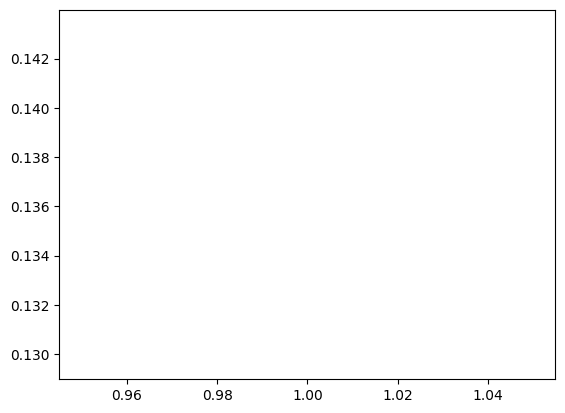

In [ ]:
import matplotlib.pyplot as plt

train_losses = []
class_losses = []
box_losses = []
obj_losses = []
rpn_losses = []
num_epochs = 1

for epoch in range(num_epochs):
    metric_logger = train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    
    # Check if the meters have recorded any value before calculating global average
    if metric_logger.meters['loss'].count > 0:
        train_losses.append(metric_logger.meters['loss'].global_avg)
    if metric_logger.meters['class_loss'].count > 0:
        class_losses.append(metric_logger.meters['class_loss'].global_avg)
    if metric_logger.meters['box_loss'].count > 0:
        box_losses.append(metric_logger.meters['box_loss'].global_avg)
    if metric_logger.meters['obj_loss'].count > 0:
        obj_losses.append(metric_logger.meters['obj_loss'].global_avg)
    if metric_logger.meters['rpn_loss'].count > 0:
        rpn_losses.append(metric_logger.meters['rpn_loss'].global_avg)

    # Evaluate on validation set
    evaluate(model, val_loader, device)

epochs = range(1, num_epochs+1)

# Plot the losses
plt.plot(epochs, train_losses, label='Training Loss')
if class_losses:
    plt.plot(epochs, class_losses, label='Classification Loss')
plt.plot(epochs, box_losses, label='Box Regression Loss')
plt.plot(epochs, obj_losses, label='Objectness Loss')
plt.plot(epochs, rpn_losses, label='RPN Loss')

plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


epochs = range(1, num_epochs+1)

# Plot the losses
plt.plot(epochs, train_losses, label='Training Loss')
if class_losses:
    plt.plot(epochs, class_losses, label='Classification Loss')
if box_losses:
    plt.plot(epochs, box_losses, label='Box Regression Loss')
if obj_losses:
    plt.plot(epochs, obj_losses, label='Objectness Loss')
if rpn_losses:
    plt.plot(epochs, rpn_losses, label='RPN Loss')

plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Define hyperparameters
lr = 0.005
momentum = 0.9
weight_decay = 0.0005
num_epochs = 10
batch_size = 4
num_workers = 4

# Define dataset and data loaders
dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/PASCAL/val')
dataset_test = PASCALDataset('/content/PASCAL/PASCAL/test')

data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, collate_fn=utils.collate_fn)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=utils.collate_fn)

# Define the model and optimizer
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)

# Move the model to the right device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Train the model
print("Starting training...")
total_loss = 0
total_loss_values = []
batch_numbers = []
for epoch in range(num_epochs):
    for i, (images, targets) in enumerate(data_loader):
        # Move images and targets to the right device
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Forward pass
        loss_dict = model(images, targets)

        # Compute the total loss
        losses = sum(loss for loss in loss_dict.values())
        total_loss += losses.item()
        total_loss_values.append(losses.item())
        batch_numbers.append(i)

        # Backward pass and optimization step
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        # Print status every 10 batches
        if i % 10 == 0:
            print(f"Epoch {epoch}, Batch {i}, Loss: {losses.item()}")

    # Evaluate on the validation set after each epoch
    evaluate(model, data_loader_val, device=device)

# Evaluate on the test set
print("Evaluating on the test set...")
evaluate(model, data_loader_test, device=device)


Starting training...
Epoch 0, Batch 0, Loss: 0.2958040237426758
Epoch 0, Batch 10, Loss: 0.19070886075496674
Epoch 0, Batch 20, Loss: 0.11668407917022705
Epoch 0, Batch 30, Loss: 0.10340476781129837
Epoch 0, Batch 40, Loss: 0.19650399684906006
Epoch 0, Batch 50, Loss: 0.21351779997348785
Epoch 0, Batch 60, Loss: 0.14108817279338837
Epoch 0, Batch 70, Loss: 0.08266083151102066
Epoch 0, Batch 80, Loss: 0.32605987787246704
Epoch 0, Batch 90, Loss: 0.19559918344020844
Epoch 0, Batch 100, Loss: 0.11310909688472748
Epoch 0, Batch 110, Loss: 0.1670447438955307
Epoch 0, Batch 120, Loss: 0.23601087927818298
Epoch 0, Batch 130, Loss: 0.13340899348258972
Epoch 0, Batch 140, Loss: 0.19673845171928406
Epoch 0, Batch 150, Loss: 0.15932513773441315
Epoch 0, Batch 160, Loss: 0.05751834809780121
Epoch 0, Batch 170, Loss: 0.18999223411083221
Epoch 0, Batch 180, Loss: 0.13392475247383118
Epoch 0, Batch 190, Loss: 0.27089276909828186
Epoch 0, Batch 200, Loss: 0.23350319266319275
Epoch 0, Batch 210, Loss: 

AttributeError: ignored

In [ ]:
# Train the model
print("Starting training...")
train_losses = []  # Initialize empty list to store losses for each epoch
for epoch in range(1):
    # Train one epoch
    metric_logger, losses = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    train_losses.append(losses)  # Append losses for current epoch to list
    # Evaluate on the validation set
    evaluate(model, data_loader_val, device=device)


Starting training...
Epoch: [0]  [  0/201]  eta: 0:07:24  lr: 0.000002  loss: 0.1691 (0.1691)  loss_classifier: 0.0714 (0.0714)  loss_box_reg: 0.0873 (0.0873)  loss_objectness: 0.0061 (0.0061)  loss_rpn_box_reg: 0.0043 (0.0043)  time: 2.2119  data: 0.7757  max mem: 13582
Epoch: [0]  [ 10/201]  eta: 0:05:42  lr: 0.000023  loss: 0.1763 (0.2102)  loss_classifier: 0.0649 (0.0781)  loss_box_reg: 0.0887 (0.1083)  loss_objectness: 0.0061 (0.0103)  loss_rpn_box_reg: 0.0121 (0.0136)  time: 1.7931  data: 0.1075  max mem: 13582
Epoch: [0]  [ 20/201]  eta: 0:05:19  lr: 0.000043  loss: 0.1888 (0.1944)  loss_classifier: 0.0778 (0.0768)  loss_box_reg: 0.0871 (0.0953)  loss_objectness: 0.0056 (0.0084)  loss_rpn_box_reg: 0.0121 (0.0138)  time: 1.7402  data: 0.0304  max mem: 13582
Epoch: [0]  [ 30/201]  eta: 0:04:59  lr: 0.000063  loss: 0.1888 (0.1981)  loss_classifier: 0.0778 (0.0783)  loss_box_reg: 0.0870 (0.0966)  loss_objectness: 0.0047 (0.0089)  loss_rpn_box_reg: 0.0142 (0.0144)  time: 1.7274  data

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Plot losses for each iteration during training
plt.figure(figsize=(10, 5))
plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
for i, losses in enumerate(train_losses):
    plt.plot(losses, label=f"Epoch {i}")
plt.legend()
plt.show()


In [ ]:
train_losses = []
train_maps = []
val_losses = []
val_maps = []

for epoch in range(num_epochs):
    # train for one epoch
    train_loss, train_map = train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    train_losses.append(train_loss.avg)
    train_maps.append(train_map.avg)
    
    # evaluate on validation set
    val_loss, val_map = evaluate(model, data_loader_val, device)
    val_losses.append(val_loss.avg)
    val_maps.append(val_map.avg)
    
    # print progress
    print(f"Epoch {epoch+1}/{num_epochs}, train_loss: {train_losses[-1]:.4f}, val_loss: {val_losses[-1]:.4f}, train_map: {train_maps[-1]:.4f}, val_map: {val_maps[-1]:.4f}")
    
# Plot the training and validation loss and mAP curves
plot_loss_curves(train_losses, val_losses)
plot_map_curves(train_maps, val_maps)


Epoch: [0]  [  0/251]  eta: 0:06:59  lr: 0.000005  loss: 0.1361 (0.1361)  loss_classifier: 0.0670 (0.0670)  loss_box_reg: 0.0615 (0.0615)  loss_objectness: 0.0034 (0.0034)  loss_rpn_box_reg: 0.0041 (0.0041)  time: 1.6717  data: 0.5702  max mem: 11804
Epoch: [0]  [ 10/251]  eta: 0:05:07  lr: 0.000045  loss: 0.1561 (0.1975)  loss_classifier: 0.0600 (0.0654)  loss_box_reg: 0.0981 (0.1100)  loss_objectness: 0.0034 (0.0083)  loss_rpn_box_reg: 0.0092 (0.0137)  time: 1.2767  data: 0.0635  max mem: 11804
Epoch: [0]  [ 20/251]  eta: 0:04:47  lr: 0.000085  loss: 0.1561 (0.1827)  loss_classifier: 0.0453 (0.0609)  loss_box_reg: 0.0803 (0.1030)  loss_objectness: 0.0030 (0.0060)  loss_rpn_box_reg: 0.0092 (0.0128)  time: 1.2228  data: 0.0157  max mem: 11804
Epoch: [0]  [ 30/251]  eta: 0:04:33  lr: 0.000125  loss: 0.1435 (0.1814)  loss_classifier: 0.0426 (0.0607)  loss_box_reg: 0.0735 (0.1028)  loss_objectness: 0.0024 (0.0053)  loss_rpn_box_reg: 0.0100 (0.0126)  time: 1.2194  data: 0.0174  max mem: 11

TypeError: ignored

In [ ]:
dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
dataset_val = PASCALDataset('/content/PASCAL/PASCAL/val')
dataset_test = PASCALDataset('/content/PASCAL/PASCAL/test')

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
data_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# initialize lists to store losses
train_losses = []
val_losses = []
class_losses = []
box_losses = []
obj_losses = []
rpn_losses = []

epoch = 1 # Replace 1 with the appropriate epoch number
print_freq = 10 # Print status every 10 iterations

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    train_loss, class_loss, box_loss, obj_loss, rpn_loss = train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    train_losses.append(train_loss)
    class_losses.append(class_loss)
    box_losses.append(box_loss)
    obj_losses.append(obj_loss)
    rpn_losses.append(rpn_loss)
    
    # Evaluate on validation set
    val_loss = evaluate(model, val_loader, device)
    val_losses.append(val_loss)
    
    # plot losses
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(train_losses)), train_losses, label='Train Loss')
    plt.plot(np.arange(len(val_losses)), val_losses, label='Validation Loss')
    plt.plot(np.arange(len(class_losses)), class_losses, label='Classification Loss')
    plt.plot(np.arange(len(box_losses)), box_losses, label='Box Regression Loss')
    plt.plot(np.arange(len(obj_losses)), obj_losses, label='Objectness Loss')
    plt.plot(np.arange(len(rpn_losses)), rpn_losses, label='RPN Box Regression Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


Epoch: [0]  [  0/251]  eta: 0:11:15  lr: 0.000025  loss: 0.1537 (0.1537)  loss_classifier: 0.0558 (0.0558)  loss_box_reg: 0.0652 (0.0652)  loss_objectness: 0.0060 (0.0060)  loss_rpn_box_reg: 0.0267 (0.0267)  time: 2.6912  data: 0.5874  max mem: 5530
Epoch: [0]  [ 10/251]  eta: 0:05:25  lr: 0.000225  loss: 0.1258 (0.1794)  loss_classifier: 0.0556 (0.0733)  loss_box_reg: 0.0598 (0.0828)  loss_objectness: 0.0061 (0.0078)  loss_rpn_box_reg: 0.0137 (0.0155)  time: 1.3491  data: 0.0669  max mem: 6786
Epoch: [0]  [ 20/251]  eta: 0:05:04  lr: 0.000425  loss: 0.1472 (0.1870)  loss_classifier: 0.0556 (0.0763)  loss_box_reg: 0.0598 (0.0885)  loss_objectness: 0.0054 (0.0068)  loss_rpn_box_reg: 0.0134 (0.0154)  time: 1.2481  data: 0.0156  max mem: 7622
Epoch: [0]  [ 30/251]  eta: 0:04:44  lr: 0.000624  loss: 0.1827 (0.2057)  loss_classifier: 0.0785 (0.0817)  loss_box_reg: 0.0904 (0.0989)  loss_objectness: 0.0042 (0.0106)  loss_rpn_box_reg: 0.0121 (0.0143)  time: 1.2528  data: 0.0167  max mem: 7622


TypeError: ignored

In [ ]:
image, target = dataset_test[random.randint(0, len(dataset_test))]
gt_labels = target['labels']
print(f"Ground truth labels: {gt_labels}")


Ground truth labels: tensor([5])


Epoch: [0]  [  0/251]  eta: 0:02:12  lr: 0.000005  loss: 0.2174 (0.2174)  loss_classifier: 0.0700 (0.0700)  loss_box_reg: 0.1399 (0.1399)  loss_objectness: 0.0039 (0.0039)  loss_rpn_box_reg: 0.0037 (0.0037)  time: 0.5284  data: 0.2866  max mem: 9448
Epoch: [0]  [ 10/251]  eta: 0:00:54  lr: 0.000045  loss: 0.2366 (0.2675)  loss_classifier: 0.0940 (0.1102)  loss_box_reg: 0.1296 (0.1295)  loss_objectness: 0.0098 (0.0106)  loss_rpn_box_reg: 0.0162 (0.0173)  time: 0.2256  data: 0.0370  max mem: 9448
Epoch: [0]  [ 20/251]  eta: 0:00:49  lr: 0.000085  loss: 0.2104 (0.2305)  loss_classifier: 0.0889 (0.0949)  loss_box_reg: 0.0965 (0.1116)  loss_objectness: 0.0082 (0.0090)  loss_rpn_box_reg: 0.0143 (0.0150)  time: 0.1964  data: 0.0118  max mem: 9448
Epoch: [0]  [ 30/251]  eta: 0:00:46  lr: 0.000125  loss: 0.1679 (0.2076)  loss_classifier: 0.0585 (0.0857)  loss_box_reg: 0.0794 (0.0995)  loss_objectness: 0.0050 (0.0079)  loss_rpn_box_reg: 0.0121 (0.0146)  time: 0.1995  data: 0.0115  max mem: 9448


TypeError: ignored

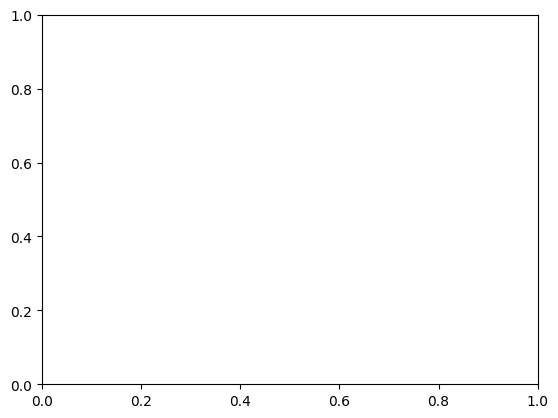

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from pascal_dataset import PASCALDataset
import utils
from engine import train_one_epoch, evaluate

# Define the dataset paths
train_dataset_path = '/content/PASCAL/PASCAL/train'
val_dataset_path = '/content/PASCAL/PASCAL/val'

# Define the batch size and number of epochs
batch_size = 4
num_epochs = 1

# Create the datasets
train_dataset = PASCALDataset(train_dataset_path)
val_dataset = PASCALDataset(val_dataset_path)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

# Load the pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Move the model to the GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Set up the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0005)

# Initialize the lists for the train and validation losses
train_losses = []
val_losses = []

# Train the model
for epoch in range(num_epochs):
    # Train for one epoch and collect the train loss
    train_loss = train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10, scaler=None)
    train_losses.append(train_loss)

    # Evaluate on the validation set and collect the validation loss
    val_loss = evaluate(model, val_loader, device)
    val_losses.append(val_loss)

# Plot and save the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('losses.pdf')


In [ ]:
import sys
import torch
import math
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from pascal_dataset import PASCALDataset
from engine import train_one_epoch, evaluate
import utils

# define train and val datasets
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# define data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

# define model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, box_detections_per_img=10)
num_classes = 21  # 20 classes + background
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# define device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# define optimizer and learning rate scheduler
params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# define training parameters
num_epochs = 10
print_freq = 10

# define lists to store losses
train_losses = []
val_losses = []

# train and validate model for each epoch
for epoch in range(num_epochs):
    # train for one epoch
    train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq=print_freq)
    train_loss = utils.flatten_dict(model.train_metrics).get('loss', None)
    train_losses.append(train_loss)

    # evaluate on validation set
    evaluate(model, val_data_loader, device=device)
    val_loss = utils.flatten_dict(model.eval_metrics).get('loss', None)
    val_losses.append(val_loss)

    # update learning rate
    lr_scheduler.step()

# plot and save the losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.savefig('train_val_loss.pdf')





Epoch: [0]  [  0/251]  eta: 0:02:09  lr: 0.000025  loss: 3.3705 (3.3705)  loss_classifier: 3.0596 (3.0596)  loss_box_reg: 0.2874 (0.2874)  loss_objectness: 0.0069 (0.0069)  loss_rpn_box_reg: 0.0165 (0.0165)  time: 0.5161  data: 0.2874  max mem: 9448
Epoch: [0]  [ 10/251]  eta: 0:00:50  lr: 0.000225  loss: 3.2313 (3.2145)  loss_classifier: 2.9276 (2.7464)  loss_box_reg: 0.4343 (0.4354)  loss_objectness: 0.0075 (0.0110)  loss_rpn_box_reg: 0.0167 (0.0217)  time: 0.2106  data: 0.0328  max mem: 9448
Epoch: [0]  [ 20/251]  eta: 0:00:46  lr: 0.000425  loss: 2.5060 (2.3046)  loss_classifier: 1.8555 (1.8555)  loss_box_reg: 0.4301 (0.4149)  loss_objectness: 0.0075 (0.0133)  loss_rpn_box_reg: 0.0167 (0.0208)  time: 0.1868  data: 0.0088  max mem: 9448
Epoch: [0]  [ 30/251]  eta: 0:00:43  lr: 0.000624  loss: 0.9839 (1.8160)  loss_classifier: 0.5909 (1.4046)  loss_box_reg: 0.2894 (0.3789)  loss_objectness: 0.0065 (0.0114)  loss_rpn_box_reg: 0.0168 (0.0211)  time: 0.1871  data: 0.0102  max mem: 9448


AttributeError: ignored

In [ ]:
coco_evaluator.coco_eval['bbox'].stats[0]

0.8381188118811881

In [ ]:
# !wget http://people.cs.pitt.edu/~nhonarvar/TA_Spring_2020/PyTorch_Installation_hw3.sh

--2023-04-19 07:36:01--  http://people.cs.pitt.edu/~nhonarvar/TA_Spring_2020/PyTorch_Installation_hw3.sh
Resolving people.cs.pitt.edu (people.cs.pitt.edu)... 136.142.35.172
Connecting to people.cs.pitt.edu (people.cs.pitt.edu)|136.142.35.172|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://people.cs.pitt.edu/~nhonarvar/TA_Spring_2020/PyTorch_Installation_hw3.sh [following]
--2023-04-19 07:36:02--  https://people.cs.pitt.edu/~nhonarvar/TA_Spring_2020/PyTorch_Installation_hw3.sh
Connecting to people.cs.pitt.edu (people.cs.pitt.edu)|136.142.35.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452 [application/x-sh]
Saving to: ‘PyTorch_Installation_hw3.sh’

PyTorch_Installatio 100%[===================>]     452  --.-KB/s    in 0s      

2023-04-19 07:36:03 (9.34 MB/s) - ‘PyTorch_Installation_hw3.sh’ saved [452/452]



In [ ]:
# !source PyTorch_Installation_hw3.sh

PyTorch_Installation_hw3.sh: line 1: module: command not found
PyTorch_Installation_hw3.sh: line 2: module: command not found
PyTorch_Installation_hw3.sh: line 3: module: command not found
PyTorch_Installation_hw3.sh: line 4: module: command not found
PyTorch_Installation_hw3.sh: line 5: mkvirtualenv: command not found
PyTorch_Installation_hw3.sh: line 6: workon: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.2.0 (from versions: 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0)
ERROR: No matching distribution found for torch==1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 42.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Pillow: filename=Pillow

In [ ]:
# deactivate

In [ ]:
torch.save(model.state_dict(), 'model1.pth')


In [ ]:
import shutil
shutil.copyfile('/content/model1.pth', '/content/drive/My Drive/model1.pth')


'/content/drive/My Drive/model1.pth'

In [ ]:
import matplotlib.pyplot as plt

from pascal_dataset import PASCALDataset

# Training dataset
train_dataset = PASCALDataset('/content/PASCAL/PASCAL/train')

# Validation dataset
val_dataset = PASCALDataset('/content/PASCAL/PASCAL/val')

# Data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, collate_fn=utils.collate_fn)

epoch = 1 # Replace 1 with the appropriate epoch number
print_freq = 1 # Print status every 10 iterations


# Define lists to store the losses
loss_list = []
loss_classifier_list = []
loss_box_reg_list = []
loss_objectness_list = []
loss_rpn_box_reg_list = []

# Training loop
for epoch in range(epoch):
    # Train for one epoch
    loss_dict = train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq, scaler=None)
    loss = loss_dict['loss'].item()
    loss_classifier = loss_dict['loss_classifier'].item()
    loss_box_reg = loss_dict['loss_box_reg'].item()
    loss_objectness = loss_dict['loss_objectness'].item()
    loss_rpn_box_reg = loss_dict['loss_rpn_box_reg'].item()
    
    # Append losses to lists
    loss_list.append(loss)
    loss_classifier_list.append(loss_classifier)
    loss_box_reg_list.append(loss_box_reg)
    loss_objectness_list.append(loss_objectness)
    loss_rpn_box_reg_list.append(loss_rpn_box_reg)
    
    # Evaluate on validation set
    evaluate(model, val_loader, device)

# Plot and save the losses separately
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.savefig('total_loss.pdf')
plt.show()

plt.plot(loss_classifier_list)
plt.xlabel('Epoch')
plt.ylabel('Classification Loss')
plt.savefig('classification_loss.pdf')
plt.show()

plt.plot(loss_box_reg_list)
plt.xlabel('Epoch')
plt.ylabel('Regression Loss')
plt.savefig('regression_loss.pdf')
plt.show()

plt.plot(loss_objectness_list)
plt.xlabel('Epoch')
plt.ylabel('Objectness Loss')
plt.savefig('objectness_loss.pdf')
plt.show()

plt.plot(loss_rpn_box_reg_list)
plt.xlabel('Epoch')
plt.ylabel('RPN Regression Loss')
plt.savefig('rpn_regression_loss.pdf')
plt.show()


Epoch: [0]  [  0/251]  eta: 9:30:10  lr: 0.000025  loss: 0.4210 (0.4210)  loss_classifier: 0.1458 (0.1458)  loss_box_reg: 0.2078 (0.2078)  loss_objectness: 0.0478 (0.0478)  loss_rpn_box_reg: 0.0195 (0.0195)  time: 136.2957  data: 0.5121
Epoch: [0]  [  1/251]  eta: 9:34:52  lr: 0.000045  loss: 0.2532 (0.3371)  loss_classifier: 0.1411 (0.1435)  loss_box_reg: 0.0976 (0.1527)  loss_objectness: 0.0099 (0.0288)  loss_rpn_box_reg: 0.0047 (0.0121)  time: 137.9710  data: 0.2565
Epoch: [0]  [  2/251]  eta: 9:45:43  lr: 0.000065  loss: 0.2532 (0.2887)  loss_classifier: 0.1411 (0.1265)  loss_box_reg: 0.0976 (0.1258)  loss_objectness: 0.0099 (0.0219)  loss_rpn_box_reg: 0.0190 (0.0144)  time: 141.1381  data: 0.1711
Epoch: [0]  [  3/251]  eta: 9:32:41  lr: 0.000085  loss: 0.2532 (0.3145)  loss_classifier: 0.1411 (0.1369)  loss_box_reg: 0.0976 (0.1471)  loss_objectness: 0.0082 (0.0181)  loss_rpn_box_reg: 0.0064 (0.0124)  time: 138.5544  data: 0.1318
Epoch: [0]  [  4/251]  eta: 9:35:56  lr: 0.000105  l

TypeError: ignored

In [ ]:
evaluate(model, val_loader, device)

creating index...
index created!
Test:  [ 0/50]  eta: 0:48:33  model_time: 57.5218 (57.5218)  evaluator_time: 0.0189 (0.0189)  time: 58.2788  data: 0.7373
Test:  [49/50]  eta: 0:00:42  model_time: 47.4316 (42.5121)  evaluator_time: 0.0074 (0.0102)  time: 43.8446  data: 0.0161
Test: Total time: 0:35:28 (42.5655 s / it)
Averaged stats: model_time: 47.4316 (42.5121)  evaluator_time: 0.0074 (0.0102)
Accumulating evaluation results...
DONE (t=0.24s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.318
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.203
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.338
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.358
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   a

In [ ]:
torch.save(model.state_dict(), 'model.pth')


In [ ]:
torch.save(model.state_dict(), 'model1.pth')
